Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters from GridSearchCV:
{'max_trials': 100, 'min_samples': 0.1, 'residual_threshold': 0.1, 'stop_probability': 0.99}

Tuned RANSAC Regressor - Mean Squared Error: 0.03221097920739565
Tuned RANSAC Regressor - R-squared: -4.1313157191050855


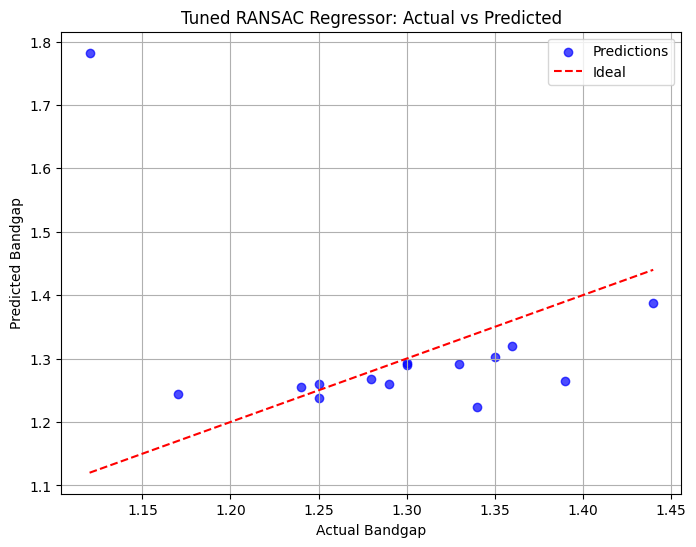

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = 'Lead + Tin 2.csv' 
data = pd.read_csv(file_path)

if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

composition_columns = ['FA', 'MA', 'Cs', 'Pb', 'Sn', 'Br', 'I','Cl']
target_column = 'Bandgap'
data = data.dropna(subset=[target_column])

X = data[composition_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'min_samples': [0.1, 0.2, 0.3, 0.5],      
    'max_trials': [100, 500, 1000],           
    'stop_probability': [0.99, 0.98, 0.95],   
    'residual_threshold': [0.1, 0.2, 0.3],    
}

ransac = RANSACRegressor(estimator=LinearRegression())

grid_search = GridSearchCV(estimator=ransac, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest Parameters from GridSearchCV:")
print(best_params)

y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTuned RANSAC Regressor - Mean Squared Error: {mse}")
print(f"Tuned RANSAC Regressor - R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.title('Tuned RANSAC Regressor: Actual vs Predicted')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.legend()
plt.grid(True)
plt.show()